# ISP560 Project

## Importing Libraries

In [8]:
# main libraries

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout

# support libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import skimage
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from skimage import data,color
from skimage.transform import resize, rescale, downscale_local_mean

import matplotlib.image as mpimg


# confusion matrix plotting

from sklearn.metrics import ConfusionMatrixDisplay, multilabel_confusion_matrix, confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [9]:
tf.config.list_physical_devices('GPU')

[]

## File Paths of Data

In [4]:
file = '../../Fast Food Classification V2/Train'
print(os.listdir(file))

['Baked Potato', 'Burger', 'Crispy Chicken', 'Donut', 'Fries', 'Hot Dog', 'Pizza', 'Sandwich', 'Taco', 'Taquito']


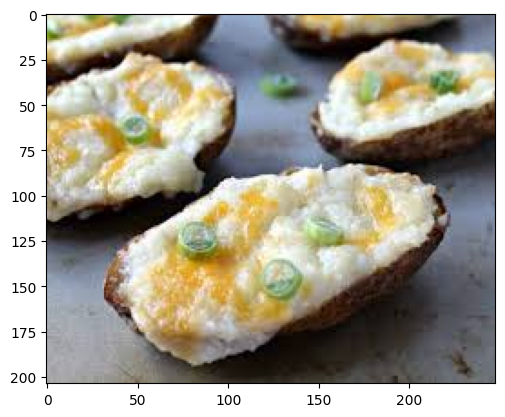

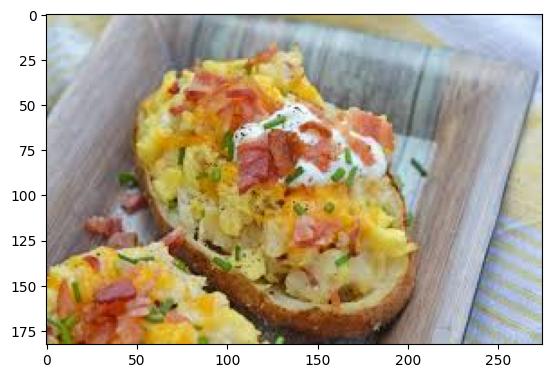

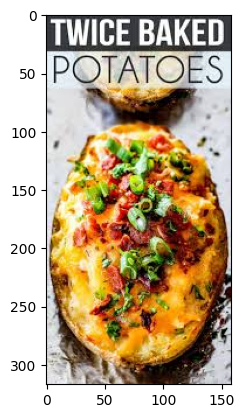

In [5]:
k=0
for fil in os.listdir('../../Fast Food Classification V2/Train/Baked Potato'):
    file = '../../Fast Food Classification V2/Train/Baked Potato/' + fil
    img = mpimg.imread(file)
    plt.imshow(img)
    plt.show()
    k+=1
    if k==3:
        break

### Resizing Image to 48 x 48 pixels

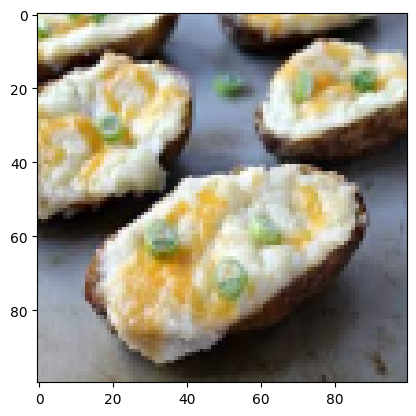

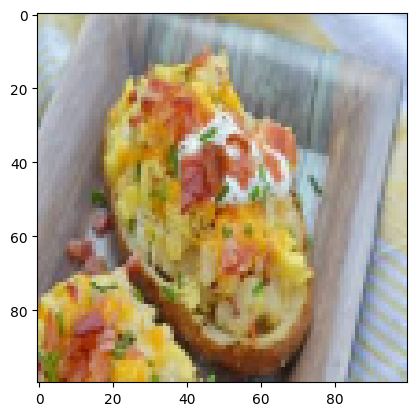

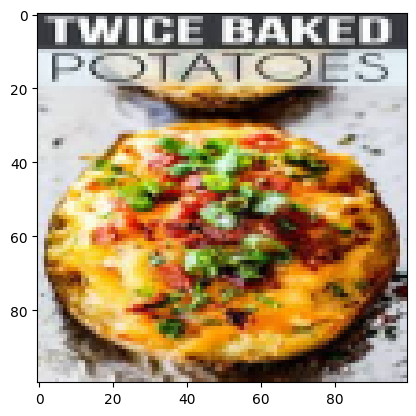

In [6]:
k=0
for fil in os.listdir('../../Fast Food Classification V2/Train/Baked Potato'):
    file = '../../Fast Food Classification V2/Train/Baked Potato/' + fil
    img = mpimg.imread(file)
    img = resize(img, (100,100,3), anti_aliasing=True)
    plt.imshow(img)
    plt.show()
    k+=1
    if k==3:
        break

## Creating Dataframe

In [1]:
def create_dataframe(path, arr, label):
    for fil in os.listdir(path):
        file = path + fil
        if file[-3:]=='pyc' or file[-2:]=='py':
            continue
        img = mpimg. imread(file)
        img = resize(img, (100,100,3), anti_aliasing=True)
        img = img.reshape(6912)
        arr.append(img)
    xx = np.ones(len(arr))*label
    arr = pd.DataFrame(arr)
    xx = pd.DataFrame({'label':xx})
    arr = pd.concat([arr, xx], axis=1)
    return arr

In [2]:
baked_potatoes = []
baked_potatoes = create_dataframe('../../Fast Food Classification V2/Train/Baked Potato/', baked_potatoes, 0)

NameError: name 'mpimg' is not defined

In [30]:
burger = []
burger = create_dataframe('../../Fast Food Classification V2/Train/Burger/', burger, 1)

In [31]:
crispy_chicken = []
crispy_chicken = create_dataframe('../../Fast Food Classification V2/Train/Crispy Chicken/', crispy_chicken, 2)

In [40]:
donut = []
donut = create_dataframe('../../Fast Food Classification V2/Train/Donut/', donut, 3)

In [42]:
fries = []
fries = create_dataframe('../../Fast Food Classification V2/Train/Fries/', fries, 4)

In [48]:
hot_dog = []
hot_dog = create_dataframe('../../Fast Food Classification V2/Train/Hot Dog/', hot_dog, 5)

In [43]:
pizza = []
pizza = create_dataframe('../../Fast Food Classification V2/Train/Pizza/', pizza, 6)

In [44]:
sandwich = []
sandwich = create_dataframe('../../Fast Food Classification V2/Train/Sandwich/', sandwich, 7)

In [46]:
taco = []
taco = create_dataframe('../../Fast Food Classification V2/Train/Taco/', taco, 8)

In [47]:
taquito = []
taquito = create_dataframe('../../Fast Food Classification V2/Train/Taquito/', taquito, 9)

In [49]:
baked_potatoes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911,label
0,0.242823,0.033232,0.012950,0.243692,0.023474,0.006252,0.254577,0.023623,0.007237,0.263616,0.028620,0.002431,0.268118,0.032814,0.001493,0.273696,0.038817,0.007397,0.260119,0.044780,0.010056,0.273685,0.055160,0.019037,0.276615,0.039758,0.024552,0.267610,0.046423,0.028536,0.293380,0.030593,0.056566,0.283282,0.041016,0.020285,0.286610,0.037253,0.021592,0.273471,...,0.637839,0.117163,0.042614,0.678494,0.114122,0.025739,0.678712,0.112313,0.023529,0.686474,0.114784,0.025698,0.705513,0.114076,0.023887,0.712625,0.119039,0.028805,0.718841,0.125506,0.033870,0.727379,0.135812,0.032802,0.734669,0.143595,0.037566,0.743227,0.151604,0.046346,0.756289,0.152294,0.074202,0.771697,0.158041,0.090647,0.774756,0.180459,0.061391,9.0
1,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,...,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,9.0
2,0.856587,0.856587,0.903645,0.862451,0.862451,0.909509,0.868563,0.868557,0.915619,0.870196,0.867519,0.916007,0.876452,0.865387,0.908683,0.880755,0.877487,0.892445,0.883579,0.882015,0.909673,0.890402,0.884993,0.929263,0.898991,0.887432,0.905264,0.897760,0.883200,0.929196,0.903148,0.892995,0.929932,0.919392,0.898451,0.918775,0.928978,0.893792,0.924218,0.902288,...,0.809840,0.805863,0.830754,0.802330,0.798408,0.821939,0.794579,0.790657,0.814193,0.788866,0.784522,0.811675,0.781320,0.773844,0.821610,0.769301,0.761458,0.812434,0.751241,0.743398,0.794368,0.742305,0.734649,0.782275,0.734786,0.730241,0.763568,0.730675,0.726753,0.758127,0.730279,0.726358,0.757730,0.724224,0.720302,0.751675,0.721646,0.717725,0.749097,9.0
3,0.879062,0.879062,0.926026,0.863805,0.863293,0.908581,0.871534,0.883560,0.918331,0.814401,0.835088,0.828238,0.633582,0.635341,0.470943,0.708165,0.462499,0.487302,0.782140,0.502115,0.483798,0.883073,0.620688,0.570559,0.923318,0.703015,0.615105,0.948345,0.819834,0.746448,0.938849,0.864042,0.824850,0.769684,0.817329,0.470175,0.682978,0.648719,0.287482,0.720543,...,0.741147,0.615467,0.543476,0.715803,0.587495,0.529271,0.635613,0.413585,0.291512,0.600622,0.272803,0.126020,0.791408,0.428100,0.160740,0.777507,0.445005,0.212143,0.676846,0.574827,0.530305,0.789236,0.793427,0.835131,0.827379,0.822894,0.866535,0.866775,0.859379,0.906722,0.860403,0.860302,0.899221,0.800252,0.795929,0.827989,0.726370,0.715719,0.708863,9.0
4,0.293146,0.408866,0.319947,0.263824,0.376760,0.270336,0.301354,0.427328,0.316969,0.285705,0.434217,0.302972,0.259027,0.437658,0.195401,0.225238,0.401492,0.094370,0.217225,0.380857,0.090800,0.235835,0.404069,0.150359,0.289684,0.441696,0.216889,0.259161,0.378054,0.221948,0.194872,0.290550,0.145735,0.187733,0.260577,0.122322,0.204825,0.268135,0.123415,0.228306,...,0.554970,0.612555,0.673020,0.486324,0.530108,0.590513,0.641259,0.716010,0.786983,0.685425,0.760304,0.834485,0.700152,0.772557,0.847478,0.697557,0.758715,0.839309,0.707060,0.768308,0.856343,0.703048,0.777420,0.862969,0.712446,0.787644,0.872793,0.707309,0.776272,0.862171,0.703416,0.771790,0.857879,0.737346,0.813025,0.900930,0.764197,0.834201,0.924944,9.0


In [50]:
burger.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911,label
0,0.137086,0.023361,0.001217,0.127568,0.014148,0.000018,0.128567,0.018359,0.003147,0.140575,0.032013,0.015902,0.142995,0.045603,0.025639,0.120507,0.029727,0.008986,0.119336,0.028279,0.008912,0.129449,0.038104,0.011810,0.128058,0.037765,0.000554,0.161983,0.072076,0.018737,0.184816,0.097149,0.040251,0.203553,0.121169,0.055700,0.210217,0.132294,0.066202,0.191812,...,0.150883,0.080298,0.064612,0.130594,0.060008,0.044322,0.138521,0.067935,0.052250,0.132685,0.062097,0.046411,0.150651,0.080062,0.065051,0.137804,0.067216,0.052860,0.155216,0.084628,0.068942,0.153531,0.082943,0.067257,0.168068,0.097481,0.081798,0.148250,0.077669,0.061984,0.154865,0.088527,0.071793,0.159459,0.109026,0.095003,0.114489,0.071342,0.055659,1.0
1,0.416396,0.295234,0.248544,0.391394,0.262601,0.196597,0.465225,0.332085,0.232255,0.567356,0.434005,0.317749,0.580989,0.450169,0.339094,0.570340,0.448922,0.360036,0.484512,0.371397,0.311288,0.433016,0.339336,0.272045,0.213220,0.148562,0.048152,0.176537,0.118267,0.025482,0.234819,0.185756,0.108755,0.462454,0.421446,0.364423,0.439685,0.409700,0.364508,0.147826,...,0.751937,0.794207,0.872927,0.769027,0.805917,0.890592,0.779174,0.805913,0.898424,0.785769,0.809300,0.903417,0.783937,0.807466,0.901584,0.780515,0.804044,0.898162,0.777885,0.801414,0.895532,0.782576,0.806105,0.900223,0.773605,0.797134,0.891252,0.770382,0.793911,0.888027,0.781089,0.804463,0.895853,0.785475,0.805413,0.888489,0.779527,0.799135,0.877573,1.0
2,0.752028,0.752028,0.783400,0.745267,0.745267,0.776639,0.749605,0.749605,0.780978,0.749749,0.749749,0.781122,0.752210,0.752191,0.783567,0.756329,0.752443,0.784956,0.764763,0.748431,0.785213,0.770098,0.752772,0.789899,0.770195,0.757894,0.790464,0.768154,0.763949,0.787803,0.766165,0.762227,0.785658,0.767246,0.761716,0.777774,0.769879,0.762093,0.766496,0.773017,...,0.999680,0.999680,0.999680,0.999994,0.999994,0.999994,0.999994,0.999994,0.999994,0.999995,0.999995,0.999995,0.999996,0.999996,0.999996,0.999989,0.999989,0.999989,0.999980,0.999980,0.999980,0.999980,0.999980,0.999980,0.999987,0.999987,0.999987,0.999994,0.999994,0.999994,0.999992,0.999992,0.999992,0.999984,0.999984,0.999984,0.999981,0.999981,0.999981,1.0
3,0.954477,0.954477,0.954477,0.952679,0.952679,0.952679,0.945873,0.945873,0.945873,0.949733,0.949733,0.949733,0.943429,0.943429,0.943429,0.938675,0.938675,0.938675,0.954668,0.954668,0.954668,0.938265,0.938265,0.938265,0.935181,0.935181,0.935181,0.953875,0.953875,0.953875,0.938544,0.938544,0.938544,0.950526,0.950526,0.950526,0.946442,0.946442,0.946442,0.946070,...,0.945156,0.945158,0.945149,0.953626,0.953626,0.953622,0.945498,0.945499,0.945497,0.941996,0.941998,0.941998,0.952122,0.952124,0.952127,0.945813,0.945814,0.945818,0.947294,0.947295,0.947298,0.964213,0.964213,0.964213,0.942848,0.942848,0.942848,0.957904,0.957904,0.957903,0.950466,0.950466,0.950466,0.940480,0.940480,0.940480,0.959346,0.959346,0.959346,1.0
4,0.227244,0.274303,0.321362,0.206450,0.253512,0.300561,0.178131,0.226166,0.270461,0.173593,0.226831,0.267069,0.192295,0.256835,0.307818,0.218141,0.287013,0.345147,0.251068,0.317790,0.380424,0.278462,0.345058,0.407733,0.263488,0.327747,0.387965,0.234826,0.298576,0.349881,0.205530,0.270979,0.307496,0.206691,0.259359,0.306603,0.226507,0.283707,0.342643,0.244507,...,0.058719,0.094094,0.112853,0.051144,0.086329,0.090285,0.045818,0.081099,0.077270,0.042337,0.077632,0.073712,0.033396,0.068690,0.064769,0.035187,0.070481,0.066559,0.037489,0.072784,0.068862,0.029154,0.064448,0.060524,0.026623,0.061917,0.057994,0.027443,0.062737,0.058815,0.028066,0.063360,0.059439,0.035905,0.071199,0.067278,0.040324,0.075619,0.071697,1.0


In [51]:
crispy_chicken.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911,label
0,0.960560,0.964482,0.984090,0.963605,0.967527,0.987131,0.969196,0.973118,0.991783,0.979721,0.983642,0.999507,0.980392,0.984314,1.000000,0.980392,0.984314,1.000000,0.980392,0.984314,1.000000,0.979729,0.984217,0.999805,0.962954,0.981668,0.993210,0.960858,0.978349,0.989387,0.974718,0.974818,0.987227,0.964037,0.946093,0.948798,0.919937,0.897288,0.897300,0.894853,...,0.940856,0.944752,0.964355,0.924601,0.928501,0.948105,0.921871,0.925787,0.945389,0.948156,0.951623,0.970479,0.965716,0.965912,0.971973,0.922562,0.924536,0.911540,0.920129,0.923662,0.900938,0.937850,0.938415,0.928459,0.961592,0.961593,0.953746,0.974860,0.974860,0.967017,0.983432,0.983432,0.975589,0.981108,0.981108,0.973265,0.985344,0.985344,0.977500,2.0
1,0.865039,0.872882,0.861118,0.869700,0.877543,0.865779,0.874330,0.882173,0.870408,0.884365,0.892208,0.880207,0.889750,0.897593,0.879661,0.880980,0.888824,0.869218,0.875868,0.883712,0.864104,0.883232,0.891075,0.871597,0.895768,0.903611,0.893654,0.903805,0.911649,0.907697,0.845114,0.852957,0.849036,0.833517,0.841378,0.837457,0.892254,0.903254,0.899332,0.883770,...,0.821162,0.832912,0.828990,0.879109,0.890856,0.886934,0.887490,0.897349,0.892953,0.876713,0.880827,0.874990,0.884472,0.888379,0.882489,0.859658,0.863565,0.857676,0.847005,0.850912,0.845022,0.835680,0.839587,0.833698,0.843054,0.846961,0.841072,0.824471,0.828378,0.822489,0.839753,0.843793,0.837970,0.835427,0.842538,0.838251,0.830815,0.838657,0.834735,2.0
2,0.062430,0.054636,0.006364,0.064277,0.053827,0.021355,0.067975,0.060389,0.041337,0.067138,0.070607,0.059463,0.064397,0.081660,0.084346,0.070395,0.088965,0.100871,0.071544,0.100409,0.123650,0.075489,0.112837,0.148883,0.081151,0.116094,0.157658,0.078626,0.111945,0.152105,0.068496,0.074651,0.078911,0.065201,0.050309,0.009487,0.076885,0.045217,0.012860,0.078700,...,0.356290,0.367430,0.403823,0.359822,0.346611,0.343127,0.406308,0.377284,0.381047,0.402758,0.396348,0.466366,0.359803,0.375118,0.458432,0.312101,0.344643,0.439627,0.255927,0.315830,0.420296,0.205132,0.281681,0.399637,0.159191,0.251799,0.384140,0.115517,0.217000,0.361611,0.089311,0.191735,0.336320,0.065493,0.173731,0.306970,0.055796,0.155238,0.276028,2.0
3,0.282087,0.238999,0.276164,0.272616,0.236241,0.270991,0.266521,0.239280,0.269271,0.264401,0.240352,0.258118,0.265171,0.241641,0.257330,0.267208,0.243679,0.259365,0.271529,0.247999,0.263685,0.267264,0.243734,0.259420,0.266667,0.243137,0.258824,0.266667,0.243137,0.258823,0.266666,0.243137,0.258824,0.266568,0.243194,0.258881,0.267593,0.243400,0.259835,0.281341,...,0.792330,0.611785,0.539094,0.786929,0.610851,0.533051,0.789118,0.607459,0.526847,0.783711,0.602216,0.521306,0.781129,0.594906,0.512709,0.782110,0.586294,0.502843,0.772280,0.582537,0.497333,0.763402,0.575231,0.488783,0.755356,0.566432,0.478242,0.756025,0.556046,0.463821,0.751228,0.545022,0.452113,0.741141,0.528243,0.436195,0.734923,0.516968,0.419021,2.0
4,0.779050,0.790814,0.669246,0.773672,0.785439,0.663868,0.772557,0.785747,0.662786,0.772277,0.794512,0.660306,0.759058,0.779535,0.654839,0.804424,0.816552,0.745957,0.865946,0.877949,0.837282,0.889188,0.898517,0.877030,0.901658,0.910352,0.885074,0.887577,0.895603,0.843173,0.863971,0.871815,0.816898,0.852469,0.859499,0.800329,0.834695,0.837976,0.754803,0.842619,...,0.949102,0.996161,0.983926,0.942493,0.989214,0.987156,0.907621,0.951295,0.959733,0.827693,0.868458,0.881381,0.794620,0.833691,0.838733,0.801051,0.838748,0.850136,0.840297,0.875833,0.897769,0.856582,0.891876,0.911545,0.853764,0.888871,0.908754,0.854519,0.883703,0.914057,0.857458,0.889410,0.918038,0.838104,0.843137,0.846372,0.558501,0.508482,0.490935,2.0


In [52]:
donut.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911,label
0,0.753315,0.724358,0.693466,0.767665,0.73779,0.70669,0.766465,0.733479,0.700630,0.770777,0.735499,0.701792,0.775659,0.741148,0.708745,0.773904,0.738401,0.706376,0.762325,0.722460,0.687259,0.763614,0.718913,0.681972,0.766713,0.720547,0.682767,0.778608,0.73448,0.697009,0.795525,0.755725,0.723467,0.796722,0.757886,0.727194,0.792652,0.755192,0.722977,0.797377,...,0.738821,0.525253,0.499623,0.850774,0.405799,0.462322,0.896921,0.565355,0.571371,0.891524,0.664364,0.634798,0.927966,0.623247,0.612379,0.951534,0.526722,0.583802,0.977397,0.600446,0.706603,0.970957,0.600725,0.691702,0.953046,0.580709,0.647028,0.953376,0.687373,0.708192,0.958311,0.780520,0.769293,0.963308,0.833851,0.826107,0.964348,0.859678,0.854008,3.0
1,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0
2,0.999998,0.999998,0.999998,0.999790,0.99979,0.99979,0.998018,0.998075,0.998046,0.994851,0.997564,0.996207,0.992946,0.999322,0.996134,0.992848,0.999396,0.996125,0.992853,0.999396,0.996117,0.992860,0.999313,0.996214,0.992797,0.997424,0.997986,0.992738,0.99604,0.999256,0.992732,0.996005,0.999332,0.991569,0.994842,0.999181,0.992397,0.995670,0.999331,0.991837,...,0.865269,0.882673,0.962672,0.842517,0.851291,0.933402,0.805560,0.808383,0.892446,0.784901,0.779709,0.867667,0.792063,0.777073,0.866038,0.832281,0.821539,0.896891,0.843921,0.837417,0.913506,0.857052,0.842268,0.924651,0.881204,0.870719,0.952796,0.910857,0.914442,0.983103,0.933955,0.944976,0.996361,0.945772,0.955153,0.998311,0.976302,0.980627,0.995808,3.0
3,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999998,0.999998,0.999998,0.999999,0.999999,0.999999,0.999999,0.999999,0.999999,0.999998,0.999998,0.999998,0.999999,0.999999,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0
4,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0


In [53]:
fries.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911,label
0,0.868626,0.897773,0.935814,0.789534,0.856707,0.923138,0.714468,0.785157,0.860416,0.745993,0.772778,0.803438,0.682375,0.658686,0.670495,0.663578,0.571811,0.525377,0.653348,0.525133,0.431762,0.657982,0.523552,0.423153,0.670512,0.533529,0.424464,0.663716,0.528769,0.419883,0.671211,0.525556,0.409089,0.666766,0.518722,0.413571,0.651443,0.515125,0.405542,0.651771,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.005702,0.005702,0.005702,0.024150,0.024150,0.024150,0.029016,0.029016,0.029016,0.029428,0.029428,0.029428,0.032186,0.032186,0.032186,0.031315,0.031315,0.031315,0.013813,0.013813,0.013813,0.004490,0.004490,0.004490,4.0
1,0.970446,0.970446,0.970446,0.975415,0.975415,0.975415,0.982959,0.982959,0.982959,0.984388,0.984388,0.984388,0.984332,0.984332,0.984332,0.984303,0.984303,0.984303,0.984266,0.984266,0.984266,0.984227,0.984227,0.984227,0.984227,0.984227,0.984227,0.984226,0.984226,0.984226,0.983467,0.983467,0.983467,0.980066,0.980066,0.980066,0.979606,0.979945,0.980625,0.976810,...,0.003922,0.003922,0.003922,0.004183,0.004183,0.004183,0.020651,0.020651,0.020651,0.058907,0.058907,0.058907,0.058690,0.058690,0.058690,0.054768,0.054768,0.054768,0.063114,0.063114,0.063114,0.066612,0.066612,0.066612,0.053210,0.053210,0.053210,0.059929,0.059930,0.059930,0.020243,0.020243,0.020243,0.003955,0.003955,0.003955,0.003922,0.003922,0.003922,4.0
2,0.826163,0.265356,0.045813,0.831598,0.270795,0.048992,0.835173,0.274390,0.040068,0.837021,0.277049,0.040150,0.844699,0.287729,0.044900,0.846624,0.293063,0.046668,0.842219,0.296810,0.042251,0.847806,0.302630,0.045043,0.853011,0.307895,0.045331,0.859782,0.318071,0.046682,0.863012,0.325861,0.043521,0.863305,0.339251,0.046484,0.901835,0.558626,0.183558,0.955727,...,0.443248,0.085316,0.039669,0.440699,0.085238,0.039572,0.440975,0.086340,0.040856,0.442080,0.081305,0.033380,0.444464,0.079403,0.036513,0.459648,0.074260,0.037535,0.469206,0.079451,0.040566,0.471546,0.076335,0.033755,0.480883,0.075933,0.034294,0.484241,0.073527,0.034820,0.499841,0.070780,0.034406,0.505743,0.076455,0.029986,0.512575,0.077412,0.033848,4.0
3,0.939108,0.939108,0.946951,0.945156,0.945156,0.952999,0.945097,0.945626,0.953416,0.925061,0.944333,0.947888,0.920495,0.941985,0.943401,0.923156,0.930060,0.940659,0.936784,0.940589,0.958037,0.942823,0.942929,0.951792,0.941446,0.941446,0.949290,0.943845,0.943845,0.951460,0.946118,0.946118,0.948138,0.941745,0.941745,0.941752,0.944553,0.944553,0.944567,0.942250,...,0.910089,0.914011,0.924145,0.912408,0.916313,0.926431,0.912545,0.914735,0.923334,0.882998,0.881346,0.897190,0.888952,0.886094,0.910984,0.911622,0.908931,0.930128,0.918069,0.916239,0.929435,0.907733,0.905153,0.920235,0.915420,0.915306,0.916139,0.919076,0.920619,0.909356,0.921241,0.923189,0.909559,0.920777,0.922718,0.909103,0.920507,0.921697,0.911578,4.0
4,0.804233,0.696170,0.637603,0.843102,0.715447,0.640300,0.860418,0.752996,0.697656,0.865155,0.743440,0.674464,0.867830,0.755912,0.669545,0.859730,0.785771,0.712416,0.863939,0.770744,0.728346,0.824670,0.731966,0.661472,0.809916,0.645690,0.512411,0.797992,0.614473,0.454108,0.873281,0.737894,0.615380,0.902705,0.779591,0.678872,0.895054,0.771785,0.674412,0.895716,...,0.368385,0.250849,0.207355,0.386883,0.271936,0.219746,0.414359,0.300612,0.243932,0.406350,0.292602,0.235183,0.413795,0.300047,0.236762,0.420601,0.306829,0.242290,0.423970,0.304668,0.243739,0.427402,0.288250,0.236684,0.409184,0.269451,0.204832,0.381307,0.241379,0.168425,0.370298,0.227483,0.159388,0.346311,0.215907,0.157898,0.338681,0.211062,0.148522,4.0


In [55]:
hot_dog.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911,label
0,0.627254,0.647719,0.662786,0.647126,0.669843,0.690405,0.663964,0.689319,0.715947,0.681492,0.710152,0.733766,0.704280,0.728000,0.752359,0.713656,0.742821,0.769614,0.725583,0.755565,0.783387,0.735076,0.766674,0.795916,0.747676,0.776178,0.807259,0.757634,0.789491,0.820312,0.771238,0.803402,0.838547,0.787614,0.822960,0.858766,0.810346,0.846273,0.881374,0.837850,...,0.735521,0.777413,0.824718,0.751731,0.796717,0.843831,0.764987,0.806559,0.853618,0.770686,0.811300,0.858359,0.769524,0.812036,0.859159,0.766476,0.807406,0.854575,0.758765,0.799124,0.843516,0.752193,0.790699,0.831528,0.747941,0.782471,0.827752,0.742295,0.780011,0.825116,0.740193,0.778601,0.825247,0.734029,0.772198,0.819895,0.726130,0.765205,0.812987,5.0
1,0.220808,0.320379,0.440621,0.238689,0.333247,0.452538,0.249075,0.338450,0.450920,0.294323,0.359691,0.456738,0.456592,0.479756,0.529247,0.522447,0.536991,0.564504,0.333982,0.370974,0.416384,0.323486,0.358850,0.402806,0.448115,0.468861,0.491612,0.545016,0.549679,0.554574,0.538641,0.538824,0.526451,0.454768,0.449122,0.433788,0.346586,0.341713,0.332068,0.232405,...,0.050226,0.042591,0.049298,0.049727,0.038704,0.042306,0.097402,0.050037,0.047081,0.323600,0.126622,0.077849,0.458937,0.176031,0.107849,0.525031,0.217925,0.150316,0.536025,0.227757,0.167654,0.499826,0.203139,0.154583,0.427765,0.127538,0.099553,0.427881,0.135079,0.100685,0.458319,0.199328,0.152482,0.312656,0.143076,0.129492,0.122046,0.085456,0.082515,5.0
2,0.989500,0.624066,0.314583,0.989112,0.656069,0.319671,0.987301,0.685491,0.329336,0.984305,0.708830,0.354013,0.986805,0.745002,0.379714,0.982265,0.778783,0.400789,0.983672,0.811502,0.423013,0.987471,0.833048,0.438026,0.992159,0.849192,0.450988,0.990850,0.861149,0.458082,0.982013,0.869183,0.460153,0.980238,0.882818,0.462162,0.981017,0.886890,0.463368,0.985835,...,0.983243,0.869488,0.461653,0.981676,0.863665,0.457225,0.982400,0.851097,0.448689,0.986075,0.838085,0.441358,0.980236,0.824734,0.430062,0.982712,0.797772,0.413354,0.980054,0.763855,0.388510,0.978208,0.733114,0.367843,0.979805,0.701160,0.348827,0.978497,0.668983,0.335420,0.985314,0.643732,0.329162,0.992594,0.617523,0.314360,0.994846,0.601225,0.306180,5.0
3,0.493708,0.371243,0.329040,0.596973,0.485900,0.441108,0.627366,0.522563,0.470764,0.812138,0.647925,0.479260,0.875394,0.643835,0.392722,0.843454,0.575251,0.322642,0.805228,0.538820,0.310966,0.778958,0.555578,0.372502,0.713095,0.587830,0.514109,0.662013,0.619137,0.621738,0.656808,0.644671,0.677028,0.672528,0.653696,0.689586,0.723192,0.667026,0.691728,0.794161,...,0.817123,0.588586,0.384174,0.803813,0.566751,0.355525,0.768491,0.499767,0.280984,0.739514,0.443973,0.225702,0.751892,0.453184,0.211643,0.818555,0.549451,0.230405,0.766666,0.506075,0.286954,0.761217,0.512228,0.323398,0.754361,0.508029,0.322962,0.738051,0.470665,0.279478,0.718685,0.431325,0.231333,0.746737,0.509579,0.335293,0.751787,0.565176,0.442044,5.0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999992,0.999992,0.999992,0.999992,0.999992,0.999992,0.999994,0.999994,0.999994,0.999998,0.999998,0.999998,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.0


In [56]:
pizza.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911,label
0,0.942164,0.957143,0.957164,0.943855,0.957071,0.945389,0.936190,0.939368,0.947924,0.906259,0.912324,0.907044,0.899732,0.891111,0.887998,0.902448,0.884007,0.889065,0.893707,0.887067,0.888991,0.886613,0.886375,0.886349,0.886280,0.886280,0.886280,0.886174,0.886174,0.886174,0.883371,0.883371,0.883371,0.883140,0.883140,0.883140,0.889820,0.889820,0.889820,0.879847,...,0.931562,0.762224,0.560089,0.890915,0.663006,0.440346,0.837419,0.536708,0.312535,0.864384,0.652456,0.438109,0.933560,0.740982,0.553838,0.824820,0.558499,0.362591,0.767385,0.551384,0.325321,0.841896,0.746976,0.455016,0.914059,0.810894,0.519668,0.918169,0.751578,0.399311,0.838223,0.616375,0.317468,0.756973,0.458278,0.198739,0.913858,0.607038,0.227240,6.0
1,0.957315,0.842442,0.574069,0.975172,0.864006,0.601899,0.983240,0.848735,0.583741,0.964593,0.875100,0.621324,0.976737,0.861320,0.604404,0.968234,0.875157,0.625794,0.973557,0.872104,0.622364,0.971682,0.870950,0.620414,0.982820,0.873802,0.630570,0.975038,0.868168,0.620485,0.965905,0.884111,0.646040,0.969441,0.876409,0.623616,0.973338,0.879896,0.643479,0.980754,...,0.969549,0.805353,0.487058,0.971246,0.814301,0.482708,0.974051,0.812137,0.506930,0.976459,0.785712,0.457563,0.988505,0.810897,0.506185,0.978879,0.788013,0.440217,0.975000,0.799172,0.473239,0.977940,0.792761,0.488135,0.976137,0.795734,0.466293,0.980801,0.820429,0.495406,0.980903,0.788648,0.464907,0.984812,0.816981,0.484216,0.952404,0.752870,0.433086,6.0
2,0.347189,0.249232,0.127412,0.368056,0.272714,0.140862,0.393022,0.298832,0.155126,0.402742,0.302980,0.172506,0.327861,0.238739,0.114733,0.268679,0.209587,0.104326,0.181096,0.136672,0.075947,0.242716,0.182013,0.098329,0.296946,0.222324,0.115763,0.305924,0.247201,0.139488,0.289584,0.230226,0.117410,0.349749,0.272736,0.150577,0.421412,0.332040,0.212994,0.461448,...,0.326000,0.244040,0.147298,0.304867,0.234906,0.135043,0.335474,0.268185,0.167458,0.348095,0.267068,0.164042,0.322867,0.241850,0.129776,0.331488,0.261928,0.148834,0.460775,0.382934,0.260065,0.473127,0.393362,0.298967,0.403775,0.331359,0.242610,0.524017,0.431565,0.324461,0.527465,0.428188,0.309631,0.518172,0.422354,0.291714,0.656855,0.559851,0.435053,6.0
3,0.882220,0.561716,0.609641,0.887388,0.628200,0.670079,0.889926,0.766854,0.793691,0.876906,0.743840,0.777081,0.891247,0.686108,0.718011,0.897672,0.626979,0.660115,0.911313,0.619152,0.662555,0.905856,0.663773,0.690630,0.888948,0.714171,0.726719,0.888153,0.708539,0.731593,0.907838,0.680945,0.707609,0.919732,0.639886,0.680251,0.927802,0.618848,0.672928,0.930658,...,0.763320,0.375586,0.060318,0.862604,0.499008,0.160135,0.937680,0.661968,0.330190,0.779839,0.337758,0.064834,0.734838,0.265345,0.013173,0.785003,0.422717,0.164700,0.803501,0.536488,0.286645,0.766363,0.392285,0.162709,0.719234,0.277024,0.086985,0.834256,0.481905,0.259466,0.881378,0.580709,0.319090,0.855885,0.569824,0.302605,0.809519,0.500198,0.239520,6.0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999957,1.000000,1.000000,0.995408,...,0.999999,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.0


In [57]:
sandwich.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911,label
0,0.960781,0.949016,0.984310,0.959582,0.947817,0.983095,0.959829,0.948064,0.983440,0.957543,0.945778,0.985683,0.943969,0.932204,0.975314,0.934463,0.922699,0.965836,0.933329,0.921565,0.964702,0.933328,0.921563,0.964701,0.933332,0.921567,0.964704,0.933791,0.921456,0.964593,0.944981,0.918658,0.961795,0.949008,0.917651,0.960788,0.949030,0.917658,0.960795,0.950399,...,0.344093,0.426550,0.384597,0.377643,0.429470,0.411078,0.477380,0.490362,0.519324,0.549065,0.557086,0.616363,0.670648,0.680979,0.734291,0.758978,0.758933,0.807491,0.730795,0.777487,0.776635,0.784321,0.797464,0.816797,0.853900,0.839703,0.903423,0.871844,0.862386,0.922510,0.885051,0.877202,0.928271,0.899029,0.891186,0.942167,0.910713,0.902870,0.953851,7.0
1,0.507949,0.500547,0.491491,0.708300,0.669835,0.646279,0.733083,0.707241,0.671767,0.821983,0.788749,0.749768,0.768583,0.734743,0.695875,0.682310,0.645411,0.607640,0.742234,0.697628,0.653491,0.791323,0.751304,0.702632,0.795074,0.768839,0.709446,0.556220,0.546683,0.495179,0.181452,0.206640,0.231600,0.165418,0.216773,0.149451,0.304631,0.404754,0.084215,0.388675,...,0.725844,0.678826,0.569874,0.719509,0.663715,0.542180,0.752918,0.710995,0.583463,0.515723,0.482888,0.407125,0.258471,0.166057,0.108227,0.367767,0.236567,0.153289,0.524260,0.360235,0.247101,0.443062,0.326004,0.243213,0.624471,0.444978,0.330029,0.641383,0.454995,0.325434,0.682148,0.506913,0.368903,0.436221,0.352063,0.273258,0.424454,0.334738,0.252392,7.0
2,0.809589,0.829197,0.813510,0.813108,0.832716,0.817029,0.808432,0.828040,0.812354,0.796671,0.816281,0.800591,0.754011,0.774995,0.757148,0.634395,0.669197,0.631208,0.400562,0.442500,0.384838,0.247150,0.282470,0.208512,0.135100,0.155325,0.071828,0.117560,0.134168,0.065365,0.176918,0.192028,0.131636,0.243272,0.281063,0.181753,0.262895,0.316273,0.169973,0.276176,...,0.782838,0.788191,0.777256,0.854431,0.851217,0.843138,0.853181,0.849007,0.841100,0.858643,0.845409,0.835238,0.862053,0.842513,0.830761,0.860374,0.838304,0.824384,0.866092,0.828865,0.799029,0.869753,0.817908,0.777537,0.857281,0.792356,0.740928,0.825371,0.755262,0.690742,0.794266,0.725840,0.648133,0.772389,0.713562,0.647991,0.856612,0.830637,0.790903,7.0
3,0.674510,0.721569,0.713725,0.674510,0.721569,0.713725,0.674550,0.721558,0.713483,0.675717,0.720513,0.697905,0.667217,0.721034,0.694668,0.663243,0.714375,0.698320,0.647462,0.657478,0.621485,0.633486,0.592220,0.535040,0.635875,0.577910,0.501859,0.660673,0.591742,0.493017,0.671060,0.594192,0.484075,0.681696,0.613503,0.508968,0.693812,0.629690,0.545602,0.732383,...,0.249248,0.132665,0.045614,0.245963,0.125719,0.028590,0.326085,0.195434,0.060950,0.448324,0.279111,0.099320,0.471071,0.273818,0.092614,0.570333,0.371926,0.161763,0.562351,0.362791,0.141514,0.578864,0.377293,0.167792,0.585139,0.381822,0.186583,0.590953,0.387284,0.196418,0.665043,0.466149,0.246066,0.697562,0.503193,0.271458,0.705817,0.519186,0.329746,7.0
4,0.693546,0.516444,0.167130,0.652077,0.485873,0.107906,0.633048,0.469272,0.103528,0.604372,0.431000,0.077026,0.584596,0.417255,0.081275,0.522543,0.367135,0.061186,0.421574,0.288620,0.069243,0.562955,0.497311,0.401321,0.611115,0.635860,0.661049,0.492180,0.520847,0.551940,0.348483,0.370443,0.429168,0.261195,0.280304,0.365295,0.303224,0.326358,0.419434,0.344025,...,0.697495,0.707145,0.673427,0.715264,0.722719,0.691726,0.727374,0.733350,0.710543,0.732731,0.741405,0.727409,0.740205,0.753360,0.742102,0.743881,0.757218,0.741205,0.748417,0.761754,0.746029,0.753221,0.766559,0.752928,0.753332,0.766708,0.753142,0.753859,0.769509,0.757685,0.757786,0.775537,0.765326,0.757519,0.775272,0.765151,0.760138,0.776789,0.769971,7.0


In [58]:
taco.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911,label
0,0.740274,0.579315,0.483470,0.670606,0.462567,0.318658,0.590880,0.373001,0.159185,0.569039,0.361038,0.112075,0.593419,0.380480,0.130783,0.632636,0.415441,0.164520,0.672144,0.431216,0.143753,0.666417,0.449582,0.281910,0.636455,0.535188,0.489833,0.715307,0.709232,0.737105,0.776924,0.800658,0.839976,0.733606,0.759272,0.805585,0.660827,0.682569,0.737758,0.606872,...,0.285826,0.304501,0.360200,0.281000,0.305150,0.348301,0.282302,0.300369,0.343950,0.286422,0.294418,0.341908,0.285344,0.293400,0.340571,0.285021,0.288652,0.331205,0.288031,0.287561,0.323786,0.282498,0.278910,0.303532,0.271959,0.268057,0.291651,0.274927,0.268893,0.293479,0.274991,0.262790,0.290279,0.288783,0.265227,0.295626,0.298877,0.271688,0.302995,8.0
1,0.161657,0.161657,0.153814,0.163274,0.163261,0.155421,0.128848,0.124941,0.118008,0.136923,0.111523,0.105569,0.207868,0.152698,0.143759,0.203832,0.142891,0.137908,0.208851,0.160439,0.162040,0.258116,0.195977,0.187434,0.306718,0.229977,0.212601,0.317063,0.234773,0.215177,0.312164,0.231172,0.210926,0.308716,0.241723,0.215707,0.311039,0.248285,0.220851,0.314975,...,0.100167,0.069994,0.120491,0.094155,0.089711,0.130682,0.066220,0.061899,0.103266,0.101753,0.082966,0.129292,0.152371,0.122355,0.179201,0.169237,0.137866,0.196692,0.182478,0.150423,0.211977,0.184541,0.149517,0.222949,0.185987,0.150693,0.225202,0.189968,0.154674,0.229184,0.188968,0.153674,0.228183,0.194797,0.159502,0.234012,0.192138,0.156844,0.231354,8.0
2,0.389071,0.160971,0.101082,0.395031,0.166908,0.106981,0.424745,0.191984,0.124642,0.479833,0.232386,0.144722,0.499357,0.250755,0.161534,0.509257,0.266069,0.173996,0.523957,0.286906,0.192426,0.542095,0.304941,0.210133,0.585045,0.339894,0.235701,0.604723,0.354397,0.244358,0.618876,0.368755,0.257082,0.632965,0.385313,0.255874,0.632325,0.384654,0.260024,0.639204,...,0.460094,0.382815,0.378238,0.449619,0.368750,0.364691,0.434942,0.352561,0.348640,0.436885,0.353627,0.349997,0.436675,0.342526,0.342842,0.440623,0.332252,0.337986,0.448045,0.330010,0.340566,0.451167,0.329856,0.352312,0.449407,0.327844,0.351369,0.450586,0.331411,0.354787,0.446230,0.336430,0.366330,0.475305,0.375334,0.414360,0.438055,0.338194,0.379465,8.0
3,0.106025,0.109927,0.086709,0.103076,0.106971,0.083757,0.109593,0.111613,0.089336,0.095041,0.091476,0.071992,0.100277,0.096536,0.077219,0.168266,0.176337,0.158005,0.256161,0.279579,0.263311,0.299029,0.322289,0.306256,0.285410,0.294531,0.283289,0.238381,0.238489,0.230600,0.183096,0.183096,0.175677,0.157002,0.157002,0.155309,0.145387,0.145390,0.145384,0.118815,...,0.013263,0.013259,0.013245,0.012526,0.012526,0.012502,0.013640,0.013639,0.013620,0.013648,0.013647,0.013642,0.013648,0.013647,0.013647,0.013649,0.013647,0.013648,0.013648,0.013647,0.013647,0.013647,0.013647,0.013647,0.013647,0.013647,0.013647,0.013647,0.013647,0.013647,0.013647,0.013647,0.013647,0.013602,0.013614,0.013608,0.013398,0.014078,0.013738,8.0
4,0.611395,0.653746,0.520469,0.607921,0.645420,0.510159,0.673614,0.663708,0.553552,0.658054,0.650965,0.535269,0.700707,0.679953,0.576393,0.668410,0.643083,0.523670,0.691174,0.666390,0.551203,0.753612,0.731167,0.656636,0.771938,0.771614,0.707463,0.807023,0.837874,0.779065,0.770878,0.817785,0.764326,0.601475,0.517814,0.463464,0.605313,0.568527,0.548290,0.566811,...,0.464527,0.349027,0.282038,0.222656,0.321193,0.112950,0.157836,0.266460,0.081086,0.142860,0.215603,0.071852,0.417012,0.414007,0.353690,0.760694,0.744617,0.702232,0.564074,0.529021,0.448521,0.253785,0.222374,0.100854,0.336745,0.274147,0.065962,0.317784,0.261224,0.065513,0.383420,0.315549,0.043898,0.289201,0.229157,0.021898,0.292128,0.253496,0.055071,8.0


In [59]:
taquito.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911,label
0,0.242823,0.033232,0.012950,0.243692,0.023474,0.006252,0.254577,0.023623,0.007237,0.263616,0.028620,0.002431,0.268118,0.032814,0.001493,0.273696,0.038817,0.007397,0.260119,0.044780,0.010056,0.273685,0.055160,0.019037,0.276615,0.039758,0.024552,0.267610,0.046423,0.028536,0.293380,0.030593,0.056566,0.283282,0.041016,0.020285,0.286610,0.037253,0.021592,0.273471,...,0.637839,0.117163,0.042614,0.678494,0.114122,0.025739,0.678712,0.112313,0.023529,0.686474,0.114784,0.025698,0.705513,0.114076,0.023887,0.712625,0.119039,0.028805,0.718841,0.125506,0.033870,0.727379,0.135812,0.032802,0.734669,0.143595,0.037566,0.743227,0.151604,0.046346,0.756289,0.152294,0.074202,0.771697,0.158041,0.090647,0.774756,0.180459,0.061391,9.0
1,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,...,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,0.964706,9.0
2,0.856587,0.856587,0.903645,0.862451,0.862451,0.909509,0.868563,0.868557,0.915619,0.870196,0.867519,0.916007,0.876452,0.865387,0.908683,0.880755,0.877487,0.892445,0.883579,0.882015,0.909673,0.890402,0.884993,0.929263,0.898991,0.887432,0.905264,0.897760,0.883200,0.929196,0.903148,0.892995,0.929932,0.919392,0.898451,0.918775,0.928978,0.893792,0.924218,0.902288,...,0.809840,0.805863,0.830754,0.802330,0.798408,0.821939,0.794579,0.790657,0.814193,0.788866,0.784522,0.811675,0.781320,0.773844,0.821610,0.769301,0.761458,0.812434,0.751241,0.743398,0.794368,0.742305,0.734649,0.782275,0.734786,0.730241,0.763568,0.730675,0.726753,0.758127,0.730279,0.726358,0.757730,0.724224,0.720302,0.751675,0.721646,0.717725,0.749097,9.0
3,0.879062,0.879062,0.926026,0.863805,0.863293,0.908581,0.871534,0.883560,0.918331,0.814401,0.835088,0.828238,0.633582,0.635341,0.470943,0.708165,0.462499,0.487302,0.782140,0.502115,0.483798,0.883073,0.620688,0.570559,0.923318,0.703015,0.615105,0.948345,0.819834,0.746448,0.938849,0.864042,0.824850,0.769684,0.817329,0.470175,0.682978,0.648719,0.287482,0.720543,...,0.741147,0.615467,0.543476,0.715803,0.587495,0.529271,0.635613,0.413585,0.291512,0.600622,0.272803,0.126020,0.791408,0.428100,0.160740,0.777507,0.445005,0.212143,0.676846,0.574827,0.530305,0.789236,0.793427,0.835131,0.827379,0.822894,0.866535,0.866775,0.859379,0.906722,0.860403,0.860302,0.899221,0.800252,0.795929,0.827989,0.726370,0.715719,0.708863,9.0
4,0.293146,0.408866,0.319947,0.263824,0.376760,0.270336,0.301354,0.427328,0.316969,0.285705,0.434217,0.302972,0.259027,0.437658,0.195401,0.225238,0.401492,0.094370,0.217225,0.380857,0.090800,0.235835,0.404069,0.150359,0.289684,0.441696,0.216889,0.259161,0.378054,0.221948,0.194872,0.290550,0.145735,0.187733,0.260577,0.122322,0.204825,0.268135,0.123415,0.228306,...,0.554970,0.612555,0.673020,0.486324,0.530108,0.590513,0.641259,0.716010,0.786983,0.685425,0.760304,0.834485,0.700152,0.772557,0.847478,0.697557,0.758715,0.839309,0.707060,0.768308,0.856343,0.703048,0.777420,0.862969,0.712446,0.787644,0.872793,0.707309,0.776272,0.862171,0.703416,0.771790,0.857879,0.737346,0.813025,0.900930,0.764197,0.834201,0.924944,9.0


### Verify number of images

In [98]:
len(baked_potatoes),len(burger),len(crispy_chicken),len(donut),len(fries),len(hot_dog),len(pizza),len(sandwich),len(taco),len(taquito)

(1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500)

In [99]:
tr1 = baked_potatoes.drop('label',1)
ts1 = baked_potatoes['label']

x_train, x_test, y_train, y_test = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

tr1 = burger.drop('label',1)
ts1 = burger['label']

x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
x_train = pd.concat([x_train, x], axis=0)
x_test = pd.concat([x_test, xx], axis=0)

y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = crispy_chicken.drop('label',1)
ts1 = crispy_chicken['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
x_train = pd.concat([x_train, x], axis=0)
x_test = pd.concat([x_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = donut.drop('label',1)
ts1 = donut['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
x_train = pd.concat([x_train, x], axis=0)
x_test = pd.concat([x_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = fries.drop('label',1)
ts1 = fries['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
x_train = pd.concat([x_train, x], axis=0)
x_test = pd.concat([x_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = hot_dog.drop('label',1)
ts1 = hot_dog['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
x_train = pd.concat([x_train, x], axis=0)
x_test = pd.concat([x_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = pizza.drop('label',1)
ts1 = pizza['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
x_train = pd.concat([x_train, x], axis=0)
x_test = pd.concat([x_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = sandwich.drop('label',1)
ts1 = sandwich['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
x_train = pd.concat([x_train, x], axis=0)
x_test = pd.concat([x_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = taco.drop('label',1)
ts1 = taco['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
x_train = pd.concat([x_train, x], axis=0)
x_test = pd.concat([x_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = taquito.drop('label',1)
ts1 = taquito['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
x_train = pd.concat([x_train, x], axis=0)
x_test = pd.concat([x_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)


C:\Users\prspc\AppData\Local\Temp\ipykernel_25140\3974306883.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tr1 = baked_potatoes.drop('label',1)
C:\Users\prspc\AppData\Local\Temp\ipykernel_25140\3974306883.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tr1 = burger.drop('label',1)
C:\Users\prspc\AppData\Local\Temp\ipykernel_25140\3974306883.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tr1 = crispy_chicken.drop('label',1)
C:\Users\prspc\AppData\Local\Temp\ipykernel_25140\3974306883.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tr1 = donut.drop('label',1)
C:\Users\prspc\AppData\Local\Temp\ipykernel_25140\3974306883.py

In [100]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 620 to 684
Columns: 6912 entries, 0 to 6911
dtypes: float64(6912)
memory usage: 632.9 MB


In [101]:
fast_food = ['baked_potatoes', 'burger', 'crispy_chicken', 'donut', 'fries', 'hot_dog', 'pizza', 'sandwich', 'taco', 'taquito']

## Preprocessing the dataset

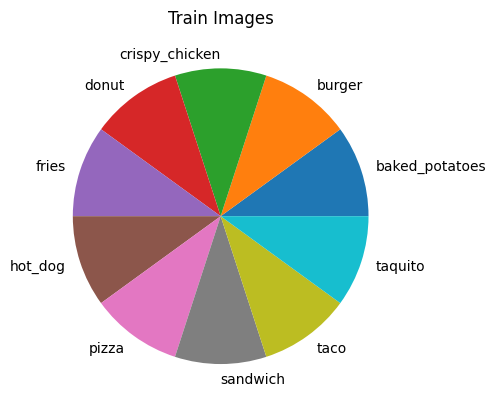

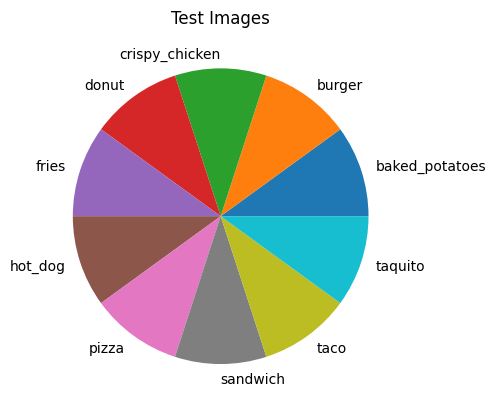

In [102]:
plt.title('Train Images')
plt.pie(y_train['label'].value_counts().values, labels=fast_food)
plt.show()

plt.title('Test Images')
plt.pie(y_test['label'].value_counts().values, labels=fast_food)
plt.show()


In [103]:
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

In [104]:
train = train.sample(frac=1)
test = test.sample(frac=1)

In [105]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911,label
1022,0.020633,0.345990,0.779719,0.020108,0.348858,0.792627,0.022519,0.350647,0.800535,0.025569,0.349524,0.798639,0.030891,0.350213,0.800694,0.027527,0.348301,0.804182,0.020743,0.347055,0.809133,0.019618,0.342716,0.804801,0.025388,0.340657,0.788301,0.025460,0.338811,0.783109,0.027498,0.335958,0.789137,0.027770,0.336580,0.784688,0.021177,0.338438,0.779925,0.022638,...,0.027542,0.231568,0.658967,0.029070,0.233439,0.659546,0.025940,0.232455,0.649159,0.030573,0.226402,0.638485,0.026501,0.225932,0.628813,0.029642,0.222490,0.626451,0.029086,0.212491,0.619424,0.031479,0.208490,0.612682,0.034178,0.210634,0.614548,0.033990,0.207871,0.610499,0.031148,0.199972,0.600068,0.028030,0.196703,0.596329,0.025968,0.194373,0.581198,5.0
664,0.752946,0.756868,0.776476,0.753981,0.757903,0.777511,0.750026,0.753948,0.773380,0.741126,0.745048,0.758671,0.739697,0.743619,0.751582,0.733627,0.737548,0.745391,0.732266,0.736187,0.744031,0.732255,0.736176,0.744019,0.731250,0.735171,0.743014,0.730285,0.734207,0.742050,0.733943,0.737865,0.745708,0.732094,0.736015,0.743858,0.736968,0.740889,0.748732,0.730757,...,0.790064,0.794289,0.762026,0.796260,0.800817,0.767558,0.798977,0.806311,0.775160,0.798509,0.808251,0.785649,0.813858,0.821480,0.809803,0.820438,0.826925,0.826088,0.822319,0.829530,0.827049,0.822311,0.829642,0.826658,0.825193,0.832550,0.829366,0.828881,0.836625,0.826291,0.816058,0.823901,0.807988,0.813035,0.820951,0.804185,0.834738,0.842987,0.825535,3.0
1356,0.966071,0.966071,0.966071,0.944450,0.944450,0.944450,0.946559,0.946559,0.946559,0.958485,0.958485,0.958485,0.929829,0.929829,0.929829,0.952231,0.952231,0.952231,0.955111,0.955111,0.955111,0.940256,0.940256,0.940256,0.957079,0.957079,0.957079,0.937102,0.937102,0.937102,0.940352,0.940352,0.940352,0.957381,0.957381,0.957381,0.934154,0.934154,0.934154,0.953631,...,0.932248,0.932248,0.932248,0.950237,0.950237,0.950237,0.946109,0.946109,0.946109,0.946598,0.946598,0.946598,0.959248,0.959248,0.959248,0.938382,0.938382,0.938382,0.948359,0.948359,0.948359,0.952000,0.952000,0.952000,0.942431,0.942431,0.942431,0.958887,0.958887,0.958887,0.938698,0.938698,0.938698,0.937152,0.937152,0.937152,0.958482,0.958482,0.958482,2.0
833,0.134884,0.181943,0.166257,0.139367,0.186425,0.170739,0.136843,0.183902,0.168216,0.126627,0.174035,0.158232,0.117988,0.170975,0.153312,0.113554,0.159909,0.144142,0.110768,0.152439,0.137537,0.106186,0.139865,0.128597,0.098258,0.122269,0.114272,0.065286,0.084375,0.078736,0.074523,0.085538,0.081957,0.088546,0.089379,0.088960,0.090726,0.090726,0.087569,0.090143,...,0.811162,0.793477,0.729380,0.798056,0.774409,0.702375,0.776135,0.742511,0.667191,0.753799,0.704598,0.620190,0.729213,0.670358,0.566804,0.710248,0.641610,0.514482,0.680622,0.604595,0.461549,0.661963,0.582820,0.436520,0.647196,0.565524,0.414707,0.640590,0.556657,0.399392,0.638087,0.553873,0.391613,0.623780,0.550650,0.386194,0.628303,0.558258,0.395396,9.0
884,0.925498,0.925498,0.925498,0.930136,0.930136,0.930136,0.932979,0.932979,0.932979,0.941944,0.941944,0.941944,0.954104,0.954104,0.954104,0.965488,0.965488,0.965488,0.976275,0.976275,0.976275,0.982450,0.982450,0.982442,0.986268,0.986267,0.984478,0.983788,0.983788,0.980220,0.982907,0.982942,0.982488,0.979234,0.979298,0.981645,0.973271,0.972552,0.977884,0.965712,...,0.551180,0.362825,0.221700,0.604213,0.400230,0.239042,0.614071,0.418886,0.255328,0.650641,0.467133,0.307135,0.709382,0.507914,0.341060,0.680562,0.472818,0.301518,0.706342,0.489493,0.313092,0.754894,0.534833,0.351556,0.758083,0.551564,0.349340,0.735499,0.534804,0.332599,0.736809,0.544817,0.347208,0.738014,0.552702,0.361179,0.741802,0.570697,0.382854,2.0


In [144]:
x_train = train.drop('label',1)
y_train = train['label']
x_test = test.drop('label',1)
y_test = test['label']

C:\Users\prspc\AppData\Local\Temp\ipykernel_25140\3643865901.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train = train.drop('label',1)
C:\Users\prspc\AppData\Local\Temp\ipykernel_25140\3643865901.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test = test.drop('label',1)


In [145]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [146]:
type(y_train[0]),type(y_test[0])

(numpy.float64, numpy.float64)

In [147]:
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

In [148]:
decoder = fast_food

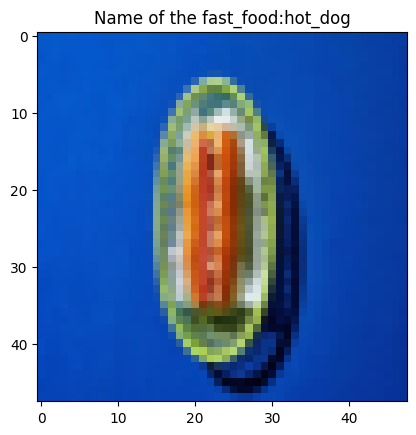

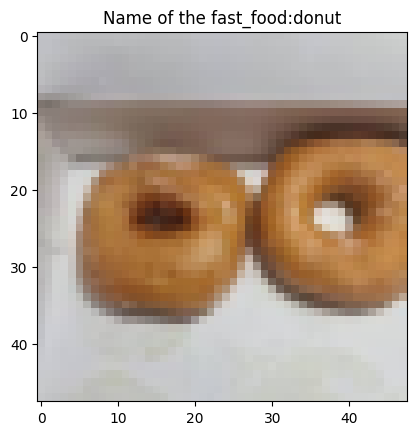

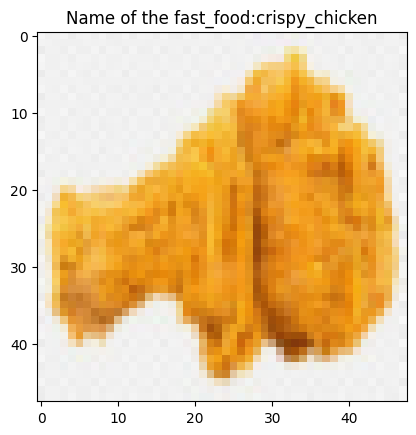

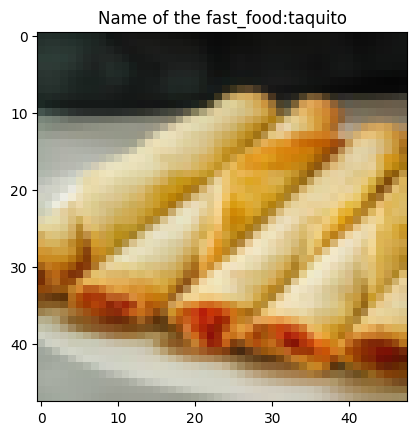

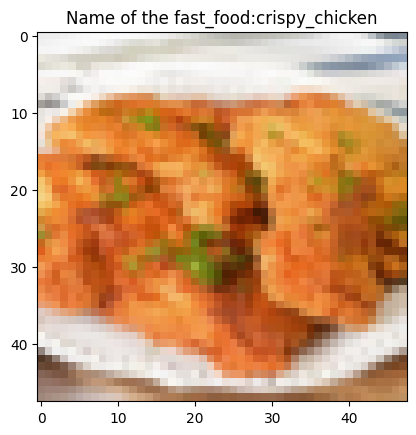

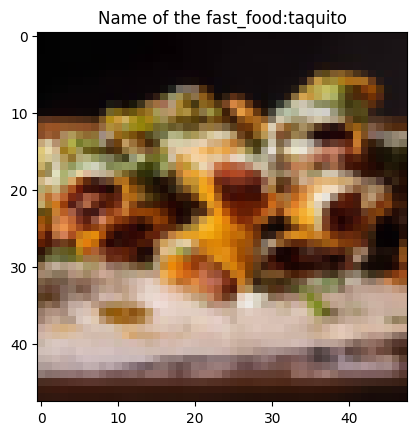

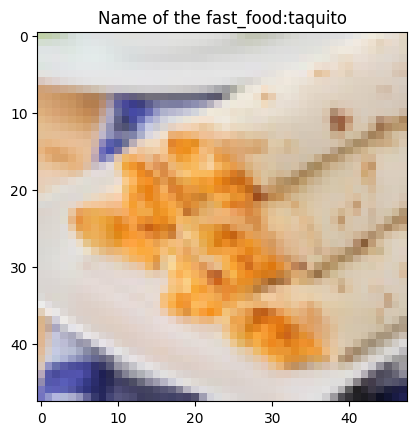

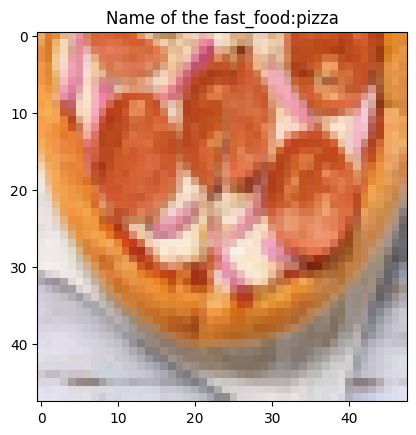

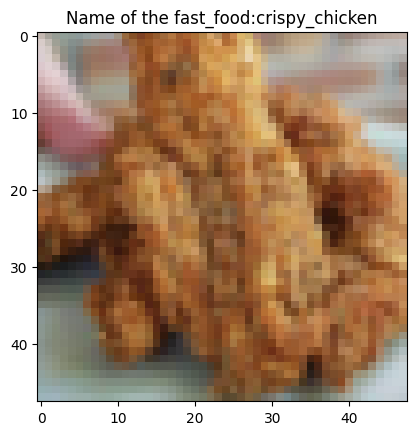

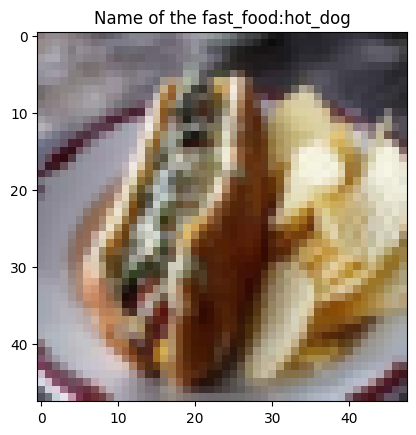

In [149]:
for i in range(10):
    plt.title('Name of the fast_food:'+decoder[y_train[i]])
    plt.imshow(x_train[i].reshape(48,48,3))
    plt.show()

In [112]:
x_train.shape,x_test.shape

((12000, 6912), (3000, 6912))

In [113]:
x_train = x_train.reshape(12000,48,48,3)
x_test = x_test.reshape(3000,48,48,3)
y_train = y_train.reshape(12000,1)
y_test = y_test.reshape(3000,1)

In [125]:
model = Sequential()

model.add(Conv2D(64, activation='relu', kernel_size=(3,3), input_shape=x_train[0].shape))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [126]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        1792      
                                                                 
 dense_8 (Dense)             (None, 46, 46, 64)        4160      
                                                                 
 dropout_4 (Dropout)         (None, 46, 46, 64)        0         
                                                                 
 dense_9 (Dense)             (None, 46, 46, 64)        4160      
                                                                 
 dropout_5 (Dropout)         (None, 46, 46, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 135424)            0         
                                                                 
 dense_10 (Dense)            (None, 128)              

## Compiling the Model

In [128]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training the Model

In [129]:
hist = model.fit(x_train, y_train, batch_size=10, epochs=15, verbose=1, validation_data=(x_test, y_test))

Epoch 1/15
1200/1200 [==============================] - 224s 186ms/step - loss: 2.2221 - accuracy: 0.1844 - val_loss: 2.0404 - val_accuracy: 0.2623
Epoch 2/15
1200/1200 [==============================] - 217s 180ms/step - loss: 1.9625 - accuracy: 0.3086 - val_loss: 1.9765 - val_accuracy: 0.3007
Epoch 3/15
1200/1200 [==============================] - 215s 179ms/step - loss: 1.7577 - accuracy: 0.3925 - val_loss: 1.8331 - val_accuracy: 0.3843
Epoch 4/15
1200/1200 [==============================] - 219s 182ms/step - loss: 1.5186 - accuracy: 0.4847 - val_loss: 1.9270 - val_accuracy: 0.3843
Epoch 5/15
1200/1200 [==============================] - 217s 181ms/step - loss: 1.1517 - accuracy: 0.6201 - val_loss: 2.0319 - val_accuracy: 0.4040
Epoch 6/15
1200/1200 [==============================] - 216s 180ms/step - loss: 0.7932 - accuracy: 0.7380 - val_loss: 2.2898 - val_accuracy: 0.3983
Epoch 7/15
1200/1200 [==============================] - 216s 180ms/step - loss: 0.5250 - accuracy: 0.8299 - val_

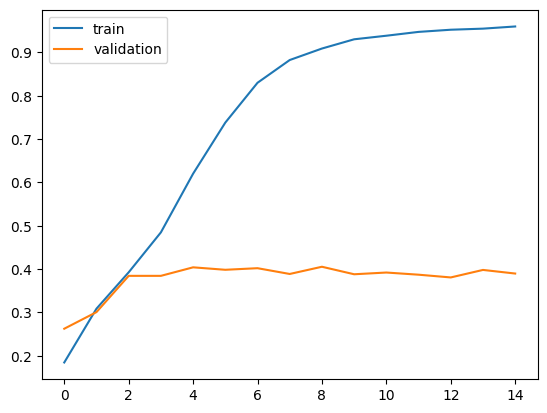

In [130]:
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

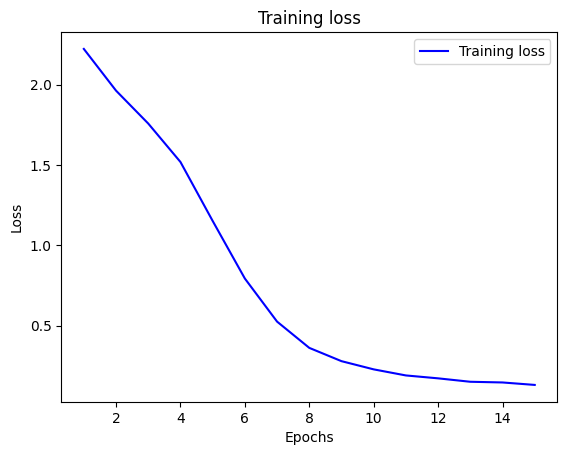

In [131]:
loss = hist.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()    
plt.show()

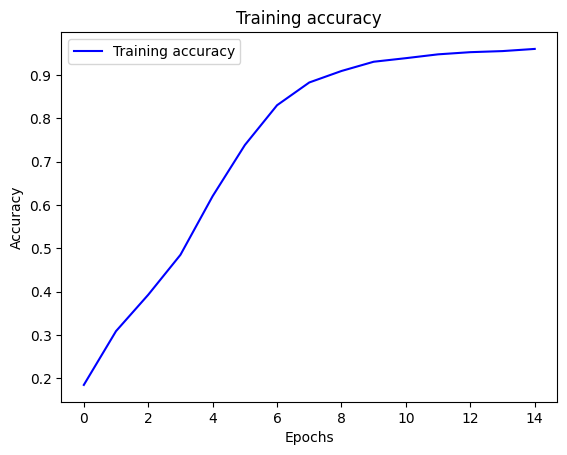

In [132]:
accuracy_values = hist.history['accuracy']
plt.plot(accuracy_values, '-b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Test Accuracy

In [133]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('\nTest accuracy:', test_acc)

94/94 [==============================] - 2s 25ms/step - loss: 4.4710 - accuracy: 0.3897

Test accuracy: 0.38966667652130127


## Confusion Matrix

In [134]:
y_pred = model.predict(x_test)
print(y_pred)

94/94 [==============================] - 2s 25ms/step
[[1.43899598e-07 8.67135554e-07 6.46257888e-07 ... 2.31217300e-07
  2.07142912e-05 9.97740746e-01]
 [6.40987636e-08 4.85301825e-06 1.88426030e-09 ... 1.40772545e-05
  1.67294183e-05 1.41224268e-06]
 [9.42094448e-06 9.80497718e-01 2.10701128e-05 ... 1.80099979e-02
  1.78354501e-04 1.23586215e-03]
 ...
 [1.71599714e-12 4.51982451e-09 1.38620919e-04 ... 9.36420634e-02
  1.59085217e-10 6.86911372e-09]
 [1.34130050e-05 1.23118707e-05 8.11352220e-05 ... 6.97289826e-04
  3.49045604e-06 5.65284282e-08]
 [3.32319949e-08 6.01314364e-15 2.45173282e-09 ... 1.18083690e-05
  2.25636865e-09 4.02811651e-09]]


In [136]:
y_pred[:5]

array([[1.43899598e-07, 8.67135554e-07, 6.46257888e-07, 2.23571248e-03,
        5.57981650e-07, 5.09688784e-11, 3.90047688e-07, 2.31217300e-07,
        2.07142912e-05, 9.97740746e-01],
       [6.40987636e-08, 4.85301825e-06, 1.88426030e-09, 1.15707968e-08,
        2.56518871e-01, 7.43442178e-01, 1.79575557e-06, 1.40772545e-05,
        1.67294183e-05, 1.41224268e-06],
       [9.42094448e-06, 9.80497718e-01, 2.10701128e-05, 3.94070554e-10,
        9.50917354e-07, 4.66664897e-05, 4.14888746e-08, 1.80099979e-02,
        1.78354501e-04, 1.23586215e-03],
       [2.10573390e-01, 2.92160394e-07, 1.27972249e-04, 1.53923145e-06,
        7.88435340e-01, 1.26721425e-05, 7.97933751e-07, 7.58648850e-04,
        8.87452115e-05, 6.05047717e-07],
       [1.97486792e-04, 9.56897438e-01, 3.01905038e-05, 1.07181977e-05,
        6.66148753e-06, 5.55592960e-05, 8.07942433e-06, 1.87779684e-02,
        2.37706508e-02, 2.45319650e-04]], dtype=float32)

In [137]:
y_test[:5]

array([[9],
       [4],
       [7],
       [0],
       [7]], dtype=int64)

In [138]:
print(np.argmax(y_pred[50]))

5


In [139]:
print(fast_food[np.argmax(y_pred[50])])

hot_dog
